# Realización de ejerccio 3.3

# Macros

In [1]:
PATH_NAME = '../Data/'
FILE_NAME1 = 'winequality-red.csv'
FILE_NAME2 = 'winequality-white.csv'

# Importación de librerias

In [2]:
import pandas as pd
import sklearn as sk
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

# Construcción del Dataframe

In [3]:
redwineDF = pd.read_csv(PATH_NAME+FILE_NAME1, sep = ';')
whitewineDF = pd.read_csv(PATH_NAME+FILE_NAME2, sep = ';')

In [4]:
redwineDF.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [37]:
whitewineDF.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


<b> Union de los dos CSV

In [6]:
redwineDF['Type']='Red'
redwineDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
 12  Type                  1599 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 162.5+ KB


In [7]:
whitewineDF['Type']='White'
whitewineDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
 12  Type                  4898 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 497.6+ KB


In [8]:
wineDF = redwineDF.append(whitewineDF)
wineDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  Type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


<b> Revisión de los datos

In [9]:
wineDF.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [10]:
print(wineDF)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  

In [11]:
wineDF = wineDF.reset_index(drop=True)

In [12]:
print(wineDF)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  

In [13]:
wineDF.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Type                    0
dtype: int64

In [14]:
wineDF.nunique()

fixed acidity           106
volatile acidity        187
citric acid              89
residual sugar          316
chlorides               214
free sulfur dioxide     135
total sulfur dioxide    276
density                 998
pH                      108
sulphates               111
alcohol                 111
quality                   7
Type                      2
dtype: int64

In [15]:
wineDF.duplicated().any() 

True

" Existen duplicados en nuestro DF"

In [16]:
dupwineDF = wineDF[wineDF.duplicated()]
dupwineDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1177 entries, 4 to 6479
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1177 non-null   float64
 1   volatile acidity      1177 non-null   float64
 2   citric acid           1177 non-null   float64
 3   residual sugar        1177 non-null   float64
 4   chlorides             1177 non-null   float64
 5   free sulfur dioxide   1177 non-null   float64
 6   total sulfur dioxide  1177 non-null   float64
 7   density               1177 non-null   float64
 8   pH                    1177 non-null   float64
 9   sulphates             1177 non-null   float64
 10  alcohol               1177 non-null   float64
 11  quality               1177 non-null   int64  
 12  Type                  1177 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 128.7+ KB


In [17]:
dupwineDF.nunique()

fixed acidity            75
volatile acidity         98
citric acid              75
residual sugar          220
chlorides               110
free sulfur dioxide      88
total sulfur dioxide    227
density                 486
pH                       87
sulphates                75
alcohol                  63
quality                   5
Type                      2
dtype: int64

[Text(0.5, 0, 'fixed acidity'),
 Text(1.5, 0, 'volatile acidity'),
 Text(2.5, 0, 'citric acid'),
 Text(3.5, 0, 'residual sugar'),
 Text(4.5, 0, 'chlorides'),
 Text(5.5, 0, 'free sulfur dioxide'),
 Text(6.5, 0, 'total sulfur dioxide'),
 Text(7.5, 0, 'density'),
 Text(8.5, 0, 'pH'),
 Text(9.5, 0, 'sulphates'),
 Text(10.5, 0, 'alcohol'),
 Text(11.5, 0, 'quality')]

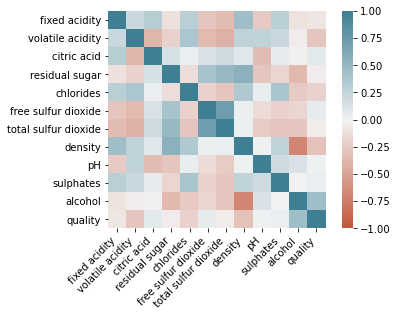

In [18]:
matriz = wineDF.corr()

ax = sns.heatmap(matriz,
    vmin=-1,
    vmax=1,
    center=0,
    square = True,
    cmap=sns.diverging_palette(20,220,n=200)
    

)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right'

)

" Se observa una alta correlación entre "alcohol" versus "quality" y entre "free sulfur dioxide" versus "total sulfur dioxide"

In [19]:
df_vars_num = wineDF.select_dtypes(exclude = [object])
df_vars_num.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


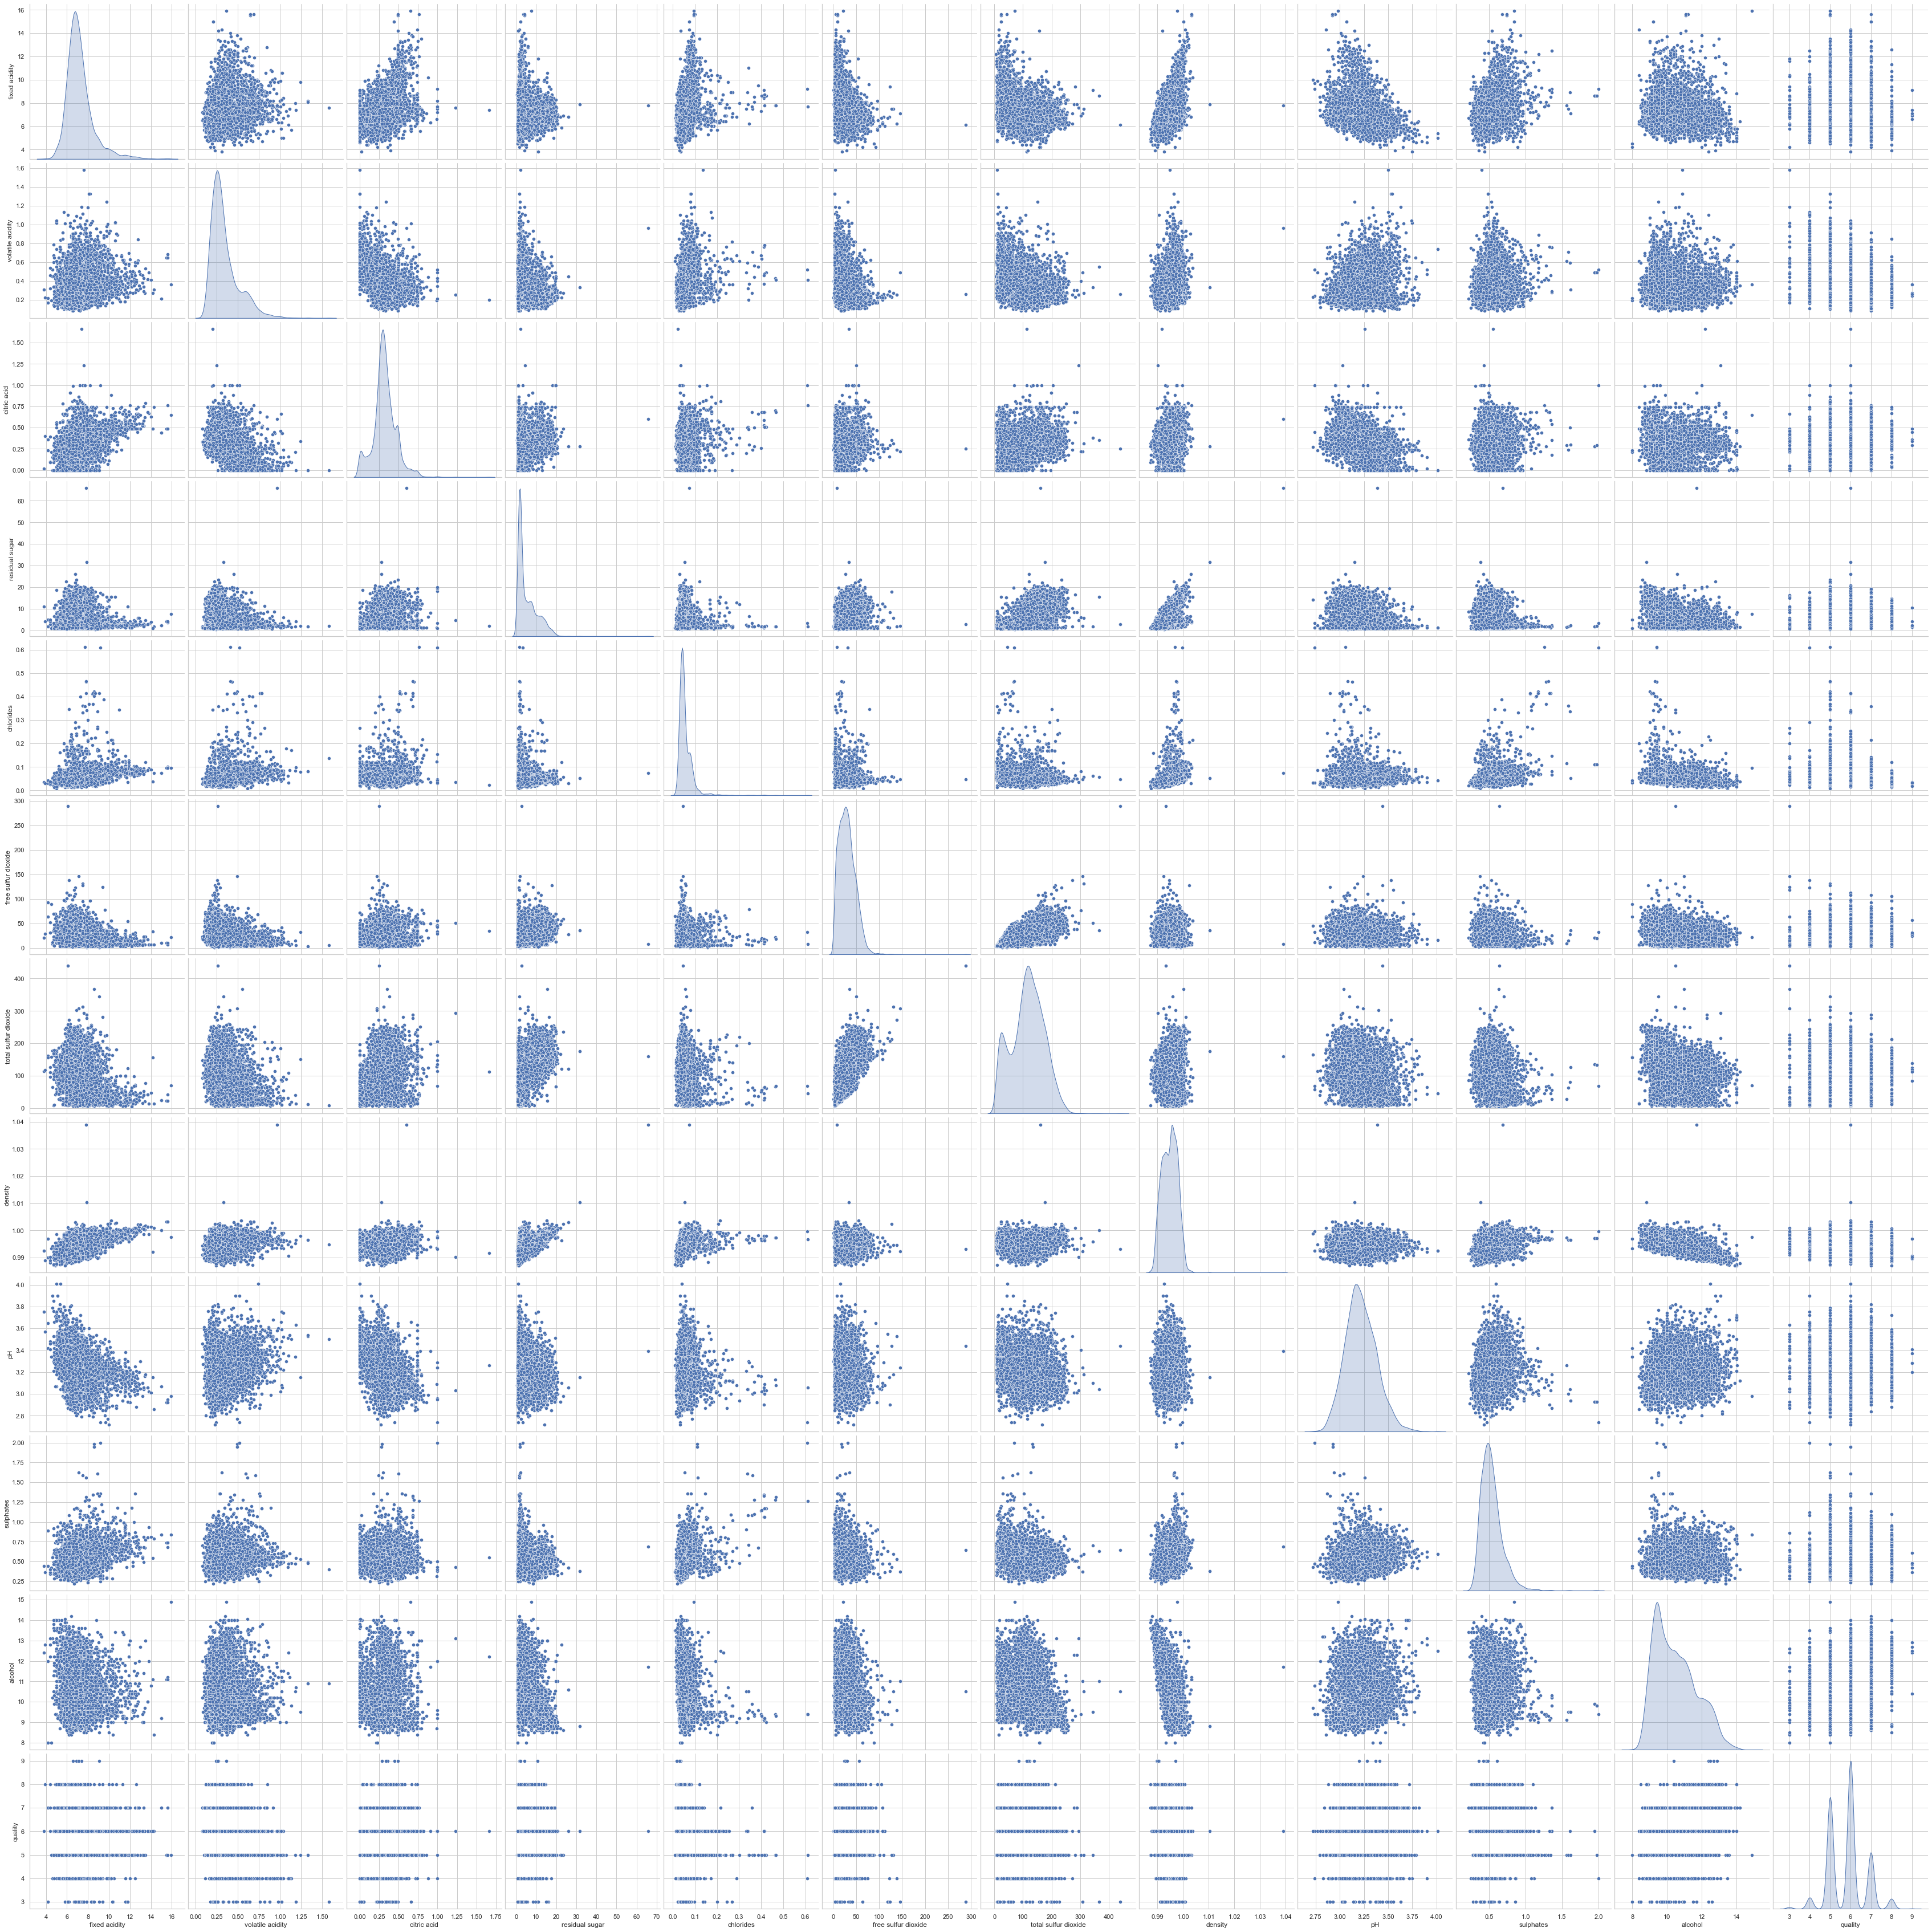

In [20]:
sns.set(style='whitegrid', color_codes=True)
quantitative_plots = sns.pairplot(df_vars_num, height=4, diag_kind='kde')

"Se observa que las variables tiene distinta distribución, por lo cual es recomendable normalizar estas variables" 

/Users/juanpablocarranza/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/juanpablocarranza/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/juanpablocarranza/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an erro

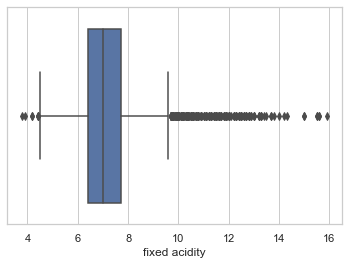

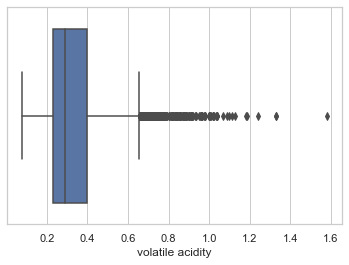

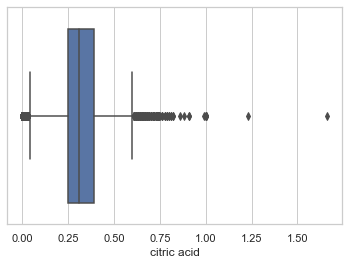

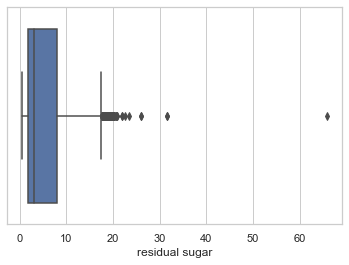

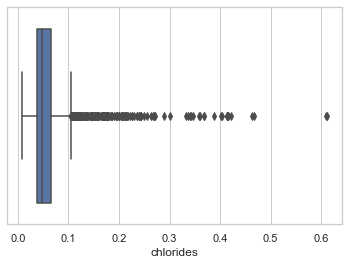

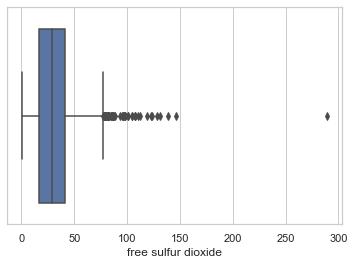

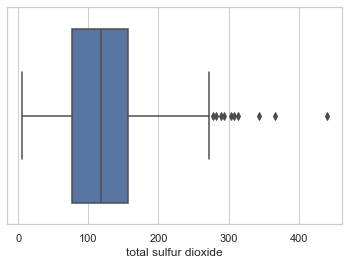

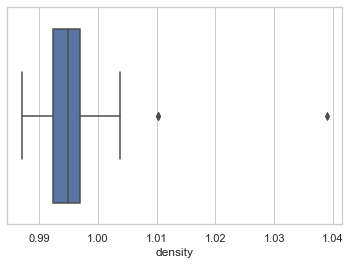

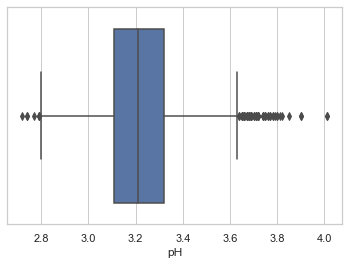

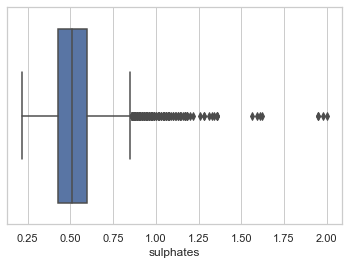

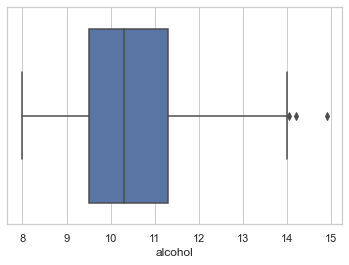

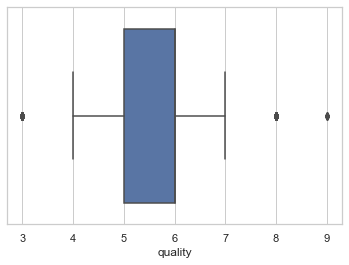

In [21]:
for col in df_vars_num.columns:
  f, ax_new = plt.subplots(1)
  sns.boxplot(wineDF[col], ax=ax_new)

Se observa los siguientes comentarios frente al data set:

1. Existen muestras (filas) duplicadas (1177 duplicados), estas muestran variedad de resultados parecidos a los no duplicados, por lo que no supone un error de datos, si no efectivamente duplicados de muestras existentes. Estas filas se almacenan en el Dataframe "dupwineDF".
2. No existen valores NULL en ninguna de las columnas.
3. La variable "quality", siendo información subjetiva obtenida por expertos en vinos, no seria relevante para este analisis, ademas considerar que se busca relacionar valores de analisis quimicos solamente.
4. Se observa en las variables (Features) "citric acid", "residual sugar", "chlorides", "free sulfur dioxide" y "sulphates" que sus valores maximos estan alejados considerablemente de la media (sobre 6 desviaciones estandar), por lo que para estos se deberia realizar un tratamiento de "outliers" o datos aberrantes. Esta hipotesis se reafirma observando los graficos "Boxplot", el cual muestra en estas variables bastantes valores fuera de rango.
5. Considerando la matriz de correlación, al existir una alta correlación entre las variables "free sulfur dioxide" y "total sulfur dioxide", se podria una de ellos, siendo la mejor opción la primera de estas asi eliminamos tambien un tratamiento de "outliers".
6. Las variables al estar en distintos rangos de valores y con distribuciones diferentes, se recomienda la normalización de estas con el fin de mejorar el modelo.

# Limpieza de datos

<b> Eliminar duplicados

In [22]:
wineDF = wineDF.drop(dupwineDF.index)
wineDF = wineDF.reset_index(drop=True)
print(wineDF)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.66         0.00             1.8      0.075   
...             ...               ...          ...             ...        ...   
5315            6.2              0.21         0.29             1.6      0.039   
5316            6.6              0.32         0.36             8.0      0.047   
5317            6.5              0.24         0.19             1.2      0.041   
5318            5.5              0.29         0.30             1.1      0.022   
5319            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  

<b> Eliminar columnas de las variables "quality" y "free sulfur dioxide"

In [23]:
lista_variables_a_eliminar = ['quality','free sulfur dioxide']
wineDF = wineDF.drop(lista_variables_a_eliminar, axis = 1)
wineDF.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,Type
0,7.4,0.70,0.00,1.9,0.076,34.0,0.9978,3.51,0.56,9.4,Red
1,7.8,0.88,0.00,2.6,0.098,67.0,0.9968,3.20,0.68,9.8,Red
2,7.8,0.76,0.04,2.3,0.092,54.0,0.9970,3.26,0.65,9.8,Red
3,11.2,0.28,0.56,1.9,0.075,60.0,0.9980,3.16,0.58,9.8,Red
4,7.4,0.66,0.00,1.8,0.075,40.0,0.9978,3.51,0.56,9.4,Red


<b> Eliminar outliers

In [24]:
meanca = wineDF['citric acid'].describe()['mean']
stdca = wineDF['citric acid'].describe()['std']
meanrs = wineDF['residual sugar'].describe()['mean']
stdrs = wineDF['residual sugar'].describe()['std']
meanch = wineDF['chlorides'].describe()['mean']
stdch = wineDF['chlorides'].describe()['std']
meansl = wineDF['sulphates'].describe()['mean']
stdsl = wineDF['sulphates'].describe()['std']

n = 6 # aca se define la cantidad de sigmas a evaluar

wineDF = wineDF[wineDF['citric acid']< (meanca+n*stdca)] # Se eliminan outliers de 'citric acid'
wineDF = wineDF[wineDF['residual sugar']< (meanrs+n*stdrs)] # Se eliminan outliers de 'residual sugar'
wineDF = wineDF[wineDF['chlorides']< (meanch+n*stdch)] # Se eliminan outliers de 'chlorides'
wineDF = wineDF[wineDF['sulphates']< (meansl+n*stdsl)] # Se eliminan outliers de 'sulphates'
print(wineDF)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.66         0.00             1.8      0.075   
...             ...               ...          ...             ...        ...   
5315            6.2              0.21         0.29             1.6      0.039   
5316            6.6              0.32         0.36             8.0      0.047   
5317            6.5              0.24         0.19             1.2      0.041   
5318            5.5              0.29         0.30             1.1      0.022   
5319            6.0              0.21         0.38             0.8      0.020   

      total sulfur dioxide 

# Proceso de normalización

In [25]:
target = wineDF['Type']
wineDF.pop('Type')
wineDF.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.66,0.00,1.8,0.075,40.0,0.9978,3.51,0.56,9.4


In [26]:
features = StandardScaler().fit_transform(wineDF)
features

array([[ 0.14409418,  2.12665809, -2.19345217, ...,  1.77687646,
         0.21848043, -0.97358961],
       [ 0.44716685,  3.19956931, -2.19345217, ..., -0.15934094,
         1.08416376, -0.63614882],
       [ 0.44716685,  2.48429516, -1.91676119, ...,  0.21541081,
         0.86774293, -0.63614882],
       ...,
       [-0.53781933, -0.61522615, -0.87917002, ..., -1.47097209,
        -0.50292235, -0.97358961],
       [-1.29550101, -0.31719526, -0.11826983, ...,  0.71507982,
        -1.08004457,  1.89465706],
       [-0.91666017, -0.79404469,  0.43511213, ...,  0.21541081,
        -1.51288624,  1.0510551 ]])

# Modelar la regresión logistica

In [27]:
particion = 0.25 # aca se define el procentaje de particion de datos deseados para el modelo y testeo
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=particion)

<b> Entrenar modelo

In [28]:
lr = LogisticRegression()
modelo = lr.fit(X_train, y_train)

In [29]:
lr.score(X_train, y_train)

0.9934442763489663

In [30]:
predicciones=lr.predict(X_test)
predicciones

array(['White', 'White', 'White', ..., 'Red', 'White', 'Red'],
      dtype=object)

In [31]:
lr.score(X_test, y_test)

0.9969765684051398

In [32]:
lr.predict_proba(X_test)

array([[1.10467739e-03, 9.98895323e-01],
       [1.56596305e-04, 9.99843404e-01],
       [1.86714625e-03, 9.98132854e-01],
       ...,
       [9.93375597e-01, 6.62440264e-03],
       [2.43704044e-02, 9.75629596e-01],
       [9.99624516e-01, 3.75484351e-04]])

In [33]:
print(metrics.classification_report(y_test,predicciones))

              precision    recall  f1-score   support

         Red       0.99      1.00      0.99       356
       White       1.00      1.00      1.00       967

    accuracy                           1.00      1323
   macro avg       1.00      1.00      1.00      1323
weighted avg       1.00      1.00      1.00      1323



<b> Para poder realizar la Matriz de confusión, roc, acc, prec, re, y F1, se debe transformar las predicciones
y etiquetas de y_test a valores numericos. 

In [34]:
newpredicciones = pd.DataFrame([0 if e == 'Red' else 1 for e in predicciones])
newy_test = pd.DataFrame([0 if e == 'Red' else 1 for e in y_test])

In [35]:
confusion_matrix(newy_test,newpredicciones)
df_cm = pd.DataFrame(confusion_matrix(newy_test,newpredicciones), columns = ['Predicted 0','Predicted 1'])
df_cm

,Predicted 0,Predicted 1
0,355,1
1,3,964


In [36]:
roc = metrics.roc_auc_score(newy_test,newpredicciones)
acc = metrics.accuracy_score(newy_test,newpredicciones)
prec = metrics.precision_score(newy_test,newpredicciones)
rec = metrics.recall_score(newy_test,newpredicciones)
f1 = metrics.f1_score(newy_test,newpredicciones)

print ( 'Roc: ', roc, '\nAccuracy: ', acc, '\nRecall: ', rec, '\nPrecision: ', prec, '\nF1 score: ', f1)

Roc:  0.9970443163728897 
Accuracy:  0.9969765684051398 
Recall:  0.9968976215098242 
Precision:  0.9989637305699481 
F1 score:  0.9979296066252588
